# Predicting the value of the invariant mass of the two electrons 'M':

## Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import mean_squared_error

In [4]:
data=pd.read_csv('/kaggle/input/cern-electron-collision-data/dielectron.csv')
data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


### Checking for Null Values

In [5]:
print(data.isna().sum())

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64


In [6]:
data=data.dropna()
data.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,99915.000000,9.991500e+04,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000
mean,147935.420007,4.957471e+08,36.460107,0.135858,0.183211,-1.509100,14.418195,-0.064143,0.022002,-0.005495,44.028549,-0.003442,0.125963,-1.591798,13.804597,-0.072885,0.021772,-0.004234,30.019521
std,920.315526,4.037736e+08,41.225336,13.409322,13.474668,51.625332,12.391213,1.462626,1.799506,0.999990,46.761747,13.130364,13.171806,61.455194,12.463948,1.738660,1.816991,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.000000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023716e+08,8.472775,-5.237190,-5.281100,-15.898650,3.773670,-1.284650,-1.526580,-1.000000,11.065550,-4.793870,-4.604685,-22.062650,3.737825,-1.892965,-1.556060,-1.000000,12.445200
50%,147929.000000,3.902917e+08,21.740200,0.141661,0.100544,-0.313360,12.972900,-0.061352,0.035015,-1.000000,25.291400,-0.035653,0.084512,-0.692463,11.690800,-0.136708,0.027453,-1.000000,21.283100
75%,149011.000000,6.339332e+08,50.059250,5.718920,5.652355,13.234400,20.026050,1.145405,1.562680,1.000000,66.983350,4.818905,5.063075,19.041800,19.601700,1.769300,1.597040,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.000000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


*Standard deviation is high for 'E1','pz1','E2','pz2'.*

### Heatmap to check Correlation

<Axes: >

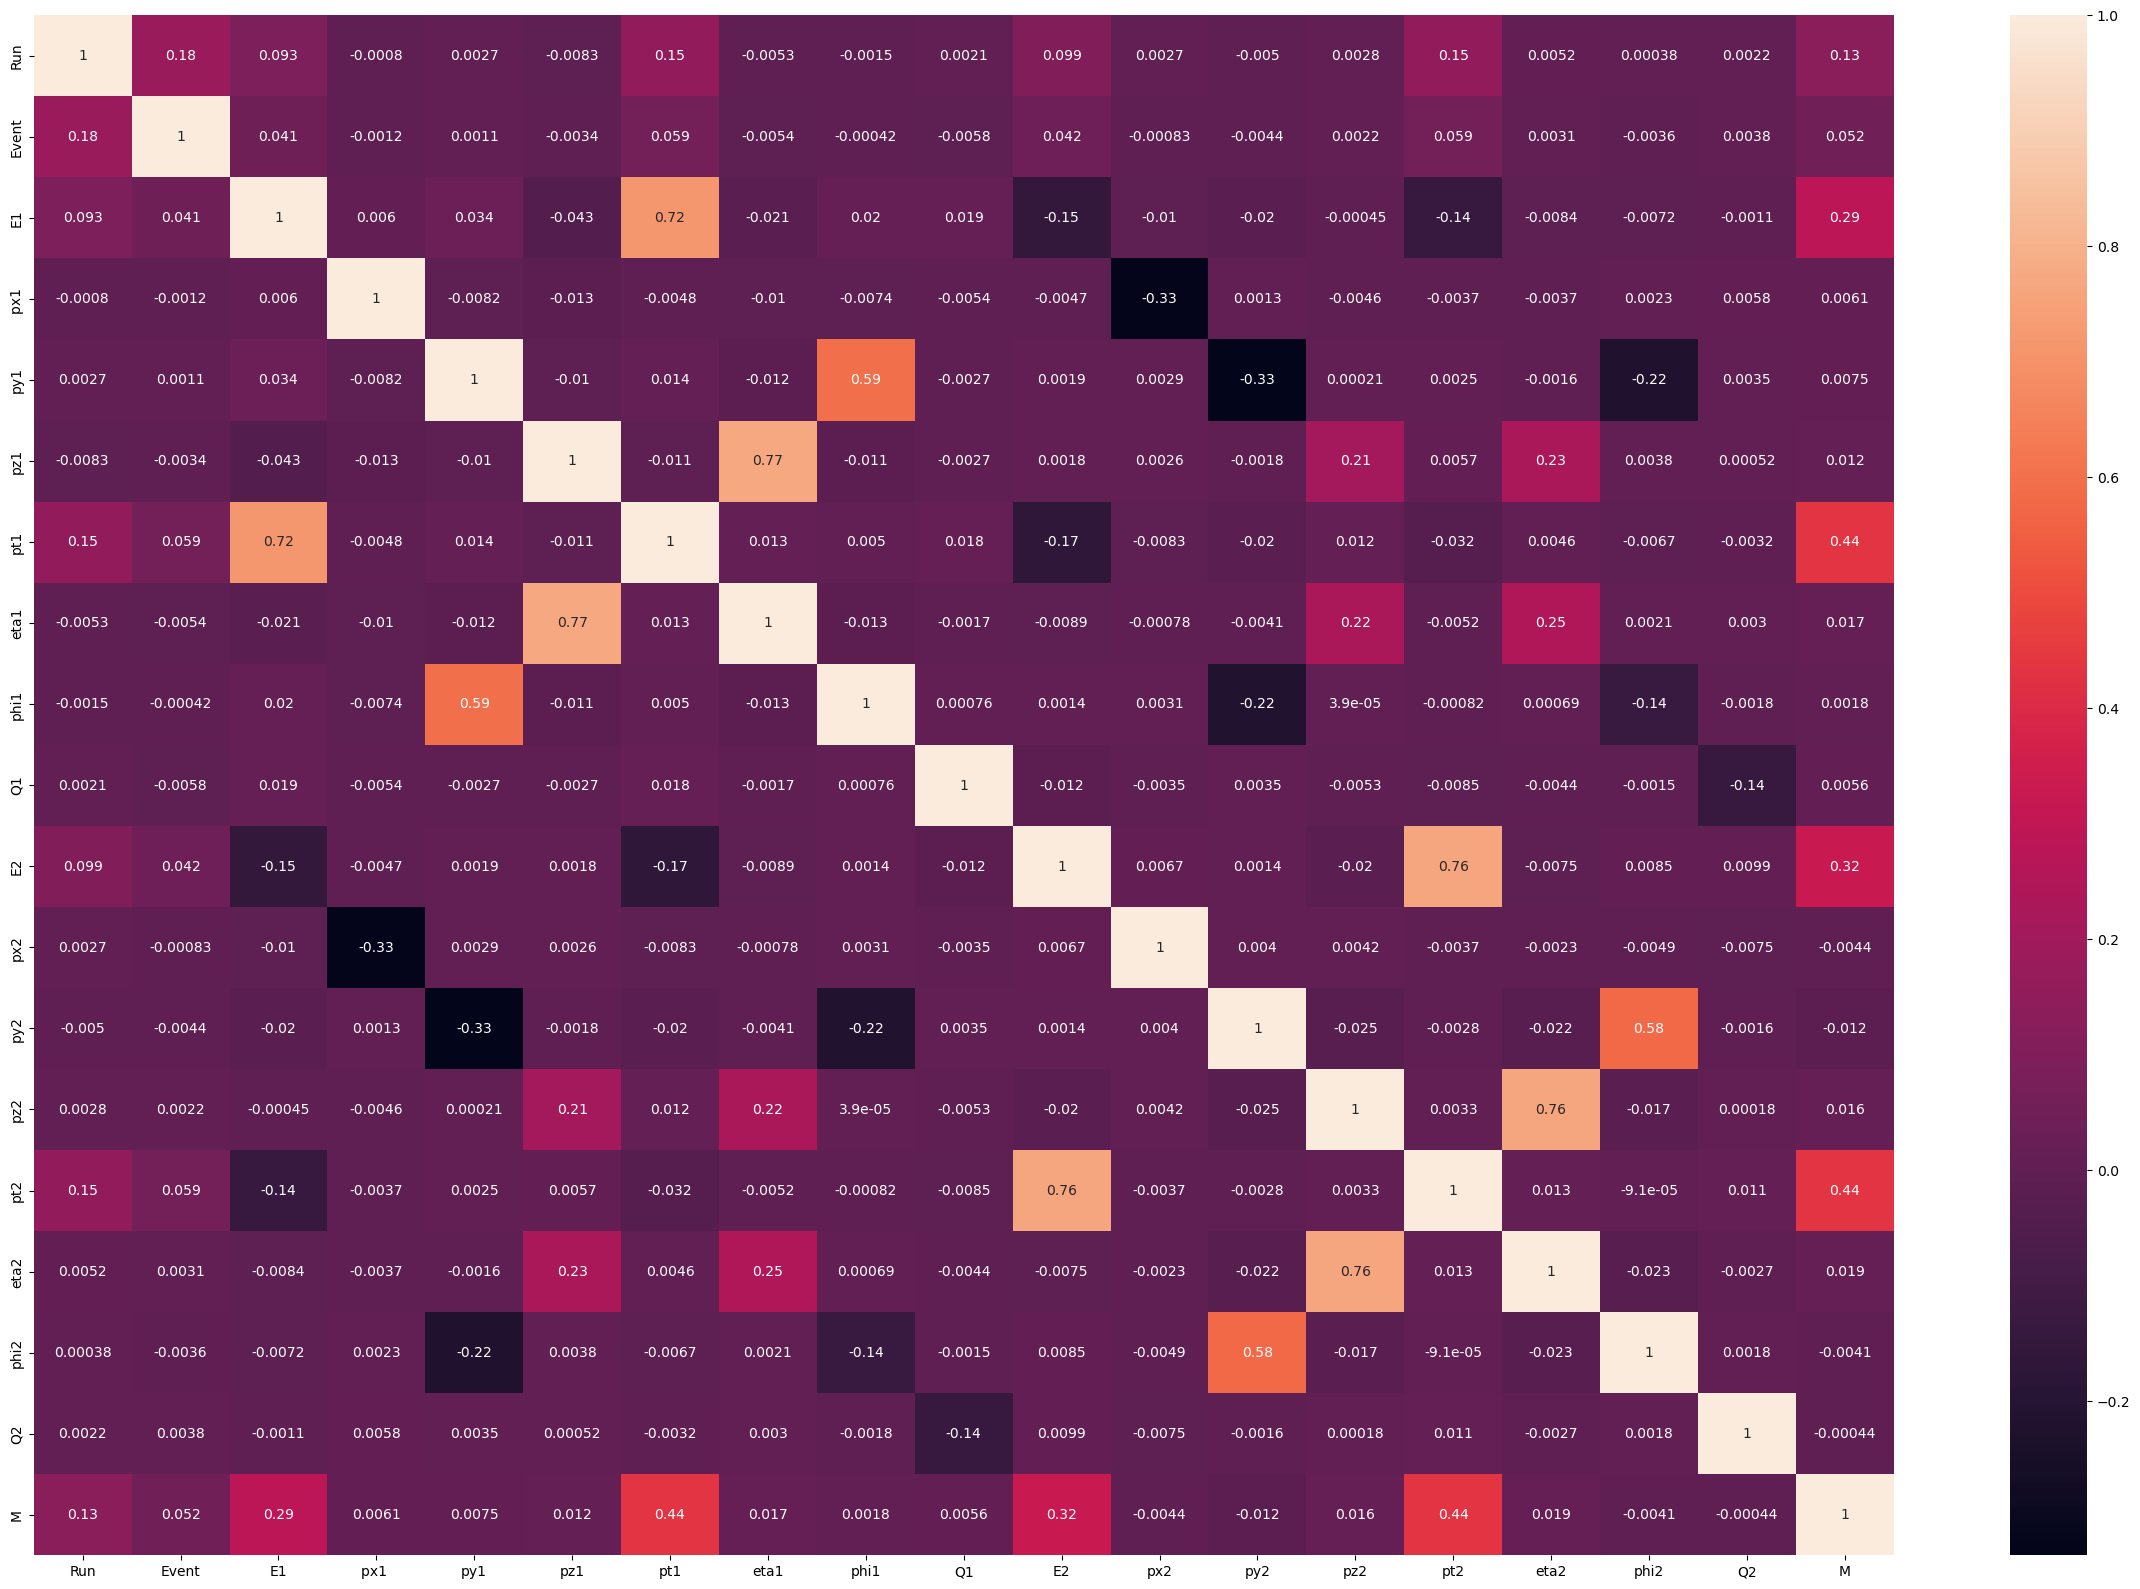

In [7]:
plt.figure(figsize = (30,20))
sb.heatmap(data.corr(),annot = True)


*'pt1' and 'E1', 'eta1' and 'pz1', 'pt2' and 'E2', 'eta2' and 'pz2' have a correlation more than 0.7.   
 'phi1' and 'py1', 'phi2' and 'py2' have a correlation more than 0.5.*

## Plotting different plots to evaluate the distribution, outliers, etc.

### Box plots

Text(0.5, 1.0, 'E1')

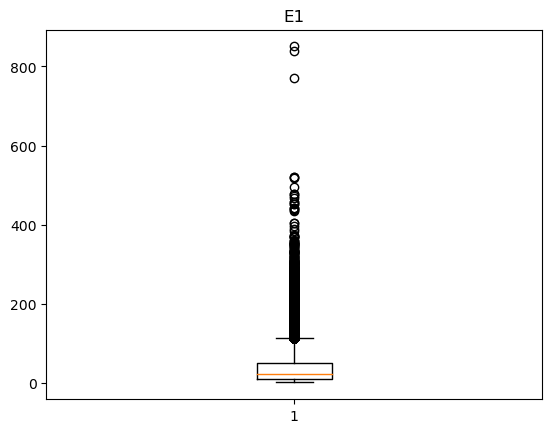

In [8]:
plt.boxplot(data.E1)
plt.title('E1')

Text(0.5, 1.0, 'E2')

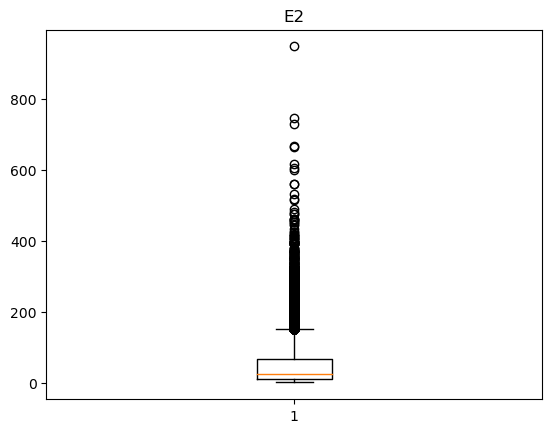

In [9]:
plt.boxplot(data.E2)
plt.title('E2')

'E1' and 'E2' have positive outliers.

Text(0.5, 1.0, 'pz1')

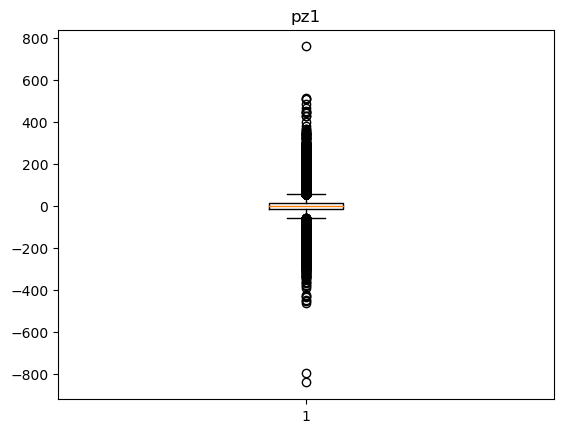

In [10]:
plt.boxplot(data.pz1)
plt.title('pz1')

Text(0.5, 1.0, 'pz2')

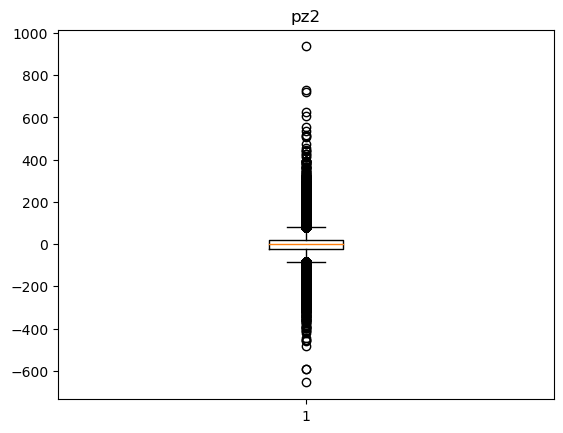

In [11]:
plt.boxplot(data.pz2)
plt.title('pz2')

'pz1' and 'pz2' have even distribution.

### Scatter Plots

Text(0.5, 1.0, 'E1 vs pt1')

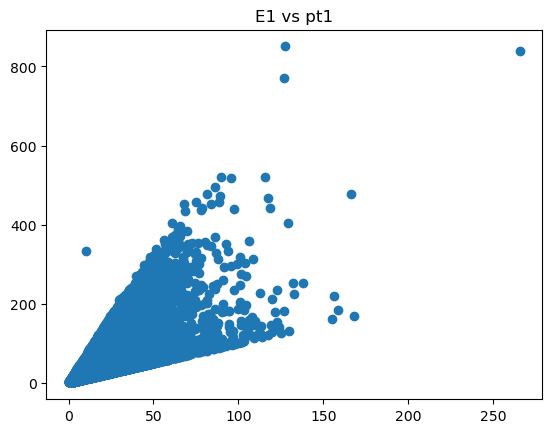

In [12]:
 plt.scatter(data.pt1,data.E1)
plt.title('E1 vs pt1')


Text(0.5, 1.0, 'eta1 vs pz1')

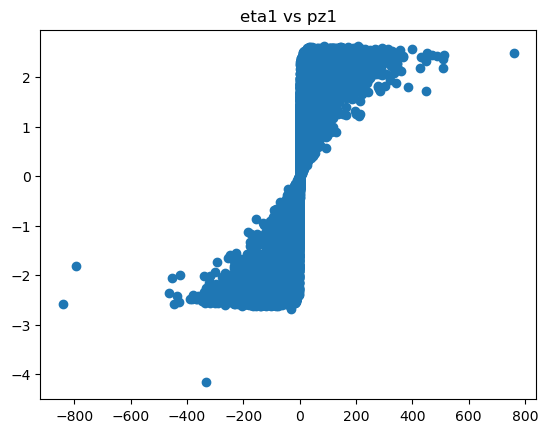

In [13]:
 plt.scatter(data.pz1,data.eta1)
plt.title('eta1 vs pz1')


Text(0.5, 1.0, 'E2 vs pt2')

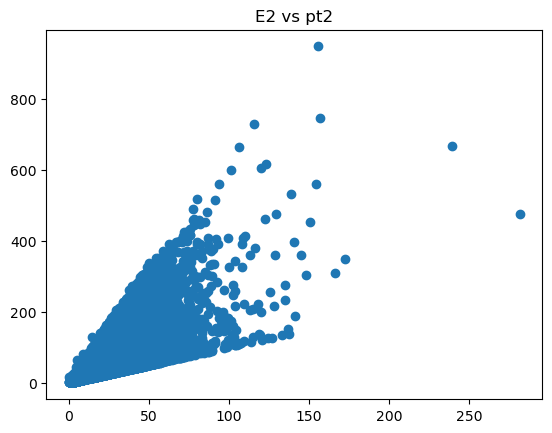

In [14]:
 plt.scatter(data.pt2,data.E2)
plt.title('E2 vs pt2')

Text(0.5, 1.0, 'eta2 vs pz2')

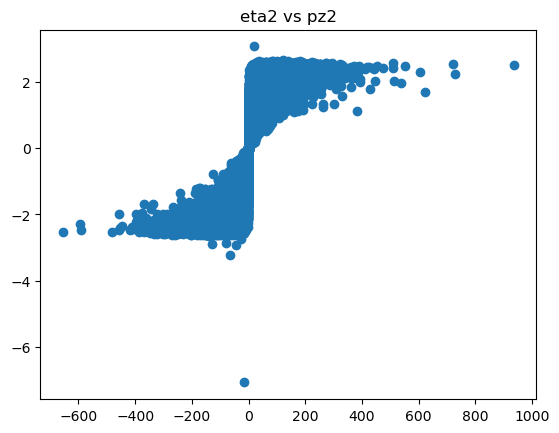

In [15]:
plt.scatter(data.pz2,data.eta2)
plt.title('eta2 vs pz2')

### Separating our target variable 'M' from the rest of the variables 

In [16]:
x=[col for col in data.columns if col!='M']
y=data.M

In [17]:
X=data[x]
Y=y

## Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Hyper-Parameter Tuning using Optuna

In [ ]:
# def objective(trial):
#     n_estimators=trial.suggest_int('n_estimators',50,20000)
#     learning_rate=trial.suggest_float('learning_rate',0.0001,1)
#     clf=AdaBoostRegressor(random_state=12,n_estimators=n_estimators,learning_rate=learning_rate)
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_test)
#     return mean_squared_error(y_test, y_pred)

# sampler = TPESampler(seed=1)
# study = optuna.create_study(direction="minimize", sampler=sampler)
# study.optimize(objective, n_trials=50)


# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))
    

[I 2023-05-26 15:05:32,474] A new study created in memory with name: no-name-a0dd2dbd-3f04-4db5-8a22-55def21eca4e
[I 2023-05-26 15:05:40,360] Trial 0 finished with value: 347.44762484335246 and parameters: {'n_estimators': 8370, 'learning_rate': 0.7203524609928139}. Best is trial 0 with value: 347.44762484335246.
[I 2023-05-26 15:06:00,032] Trial 1 finished with value: 345.5060211822783 and parameters: {'n_estimators': 52, 'learning_rate': 0.30240233937457656}. Best is trial 1 with value: 345.5060211822783.
[I 2023-05-26 15:07:00,571] Trial 2 finished with value: 347.03871220598154 and parameters: {'n_estimators': 2977, 'learning_rate': 0.09242936090932093}. Best is trial 1 with value: 345.5060211822783.
[I 2023-05-26 15:07:19,823] Trial 3 finished with value: 350.08028629390304 and parameters: {'n_estimators': 3766, 'learning_rate': 0.3456261709703434}. Best is trial 1 with value: 345.5060211822783.
[I 2023-05-26 15:07:30,248] Trial 4 finished with value: 345.0783114169725 and paramet

*The best trial is trial 16 with mean square error: 343.87157014594555.
The best value for 'n_estimators' is 15440 and 'learning_rate' is 0.025714005236096585.*


## Model with best parameters

In [20]:
clf=AdaBoostRegressor(random_state=12,n_estimators=15440,learning_rate=0.025714005236096585)
clf.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.025714005236096585, n_estimators=15440,
                  random_state=12)

## Predictions

In [21]:
y_pred=clf.predict(X_test)

## Checking RMSE Score

In [22]:
print("RMSE :",(mean_squared_error(y_test, y_pred))**0.5)

RMSE : 18.543774430949746


# Thank You!! 